In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the path to the dataset folder
dataset_path = '/content/drive/MyDrive/Dataset'

# Define the labels and corresponding folder names
labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
label_mapping = {label: i for i, label in enumerate(labels)}

# Initialize empty lists for storing data and labels
data = []
target = []

# Iterate over each label and load the images
for label in labels:
    folder_path = os.path.join(dataset_path, label)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img_arr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_array = np.array(img_arr) / 255.0
        data.append(img_array)
        target.append(label_mapping[label])

In [ ]:
# Convert the data and target lists to numpy arrays
data = np.array(data)
target = np.array(target)

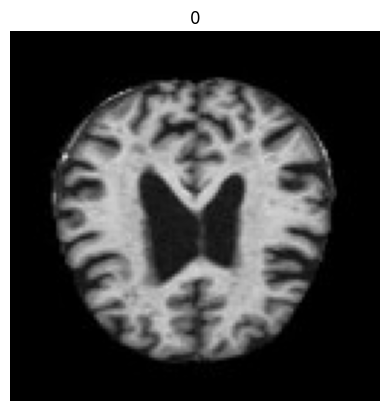

In [ ]:
plt.imshow(data[1], cmap='gray')
plt.title(target[1])
plt.axis('off')
plt.show()

In [ ]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
np.save('preprocessed data\X_train.npy', X_train)
np.save('preprocessed data\X_val.npy', X_val)
np.save('preprocessed data\X_test.npy', X_test)
np.save('preprocessed data\y_train.npy', y_train)
np.save('preprocessed data\y_val.npy', y_val)
np.save('preprocessed data\y_test.npy', y_test)

In [ ]:
X_train = np.load('preprocessed data\X_train.npy')
X_val = np.load('preprocessed data\X_val.npy')
X_test = np.load('preprocessed data\X_test.npy')
y_train = np.load('preprocessed data\y_train.npy')
y_val = np.load('preprocessed data\y_val.npy')
y_test = np.load('preprocessed data\y_test.npy')

In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=40, batch_size=64, verbose=1)

Epoch 1/40
60/60 [==============================] - 91s 1s/step - loss: 1.0735 - accuracy: 0.4901 - val_loss: 1.0076 - val_accuracy: 0.5047
Epoch 2/40
60/60 [==============================] - 89s 1s/step - loss: 0.9925 - accuracy: 0.5279 - val_loss: 0.9461 - val_accuracy: 0.5578
Epoch 3/40
60/60 [==============================] - 85s 1s/step - loss: 0.9202 - accuracy: 0.5706 - val_loss: 0.8681 - val_accuracy: 0.5844
Epoch 4/40
60/60 [==============================] - 89s 1s/step - loss: 0.8637 - accuracy: 0.5898 - val_loss: 0.8469 - val_accuracy: 0.6187
Epoch 5/40
60/60 [==============================] - 88s 1s/step - loss: 0.8003 - accuracy: 0.6464 - val_loss: 0.7619 - val_accuracy: 0.6672
Epoch 6/40
60/60 [==============================] - 88s 1s/step - loss: 0.7231 - accuracy: 0.6758 - val_loss: 0.6609 - val_accuracy: 0.7086
Epoch 7/40
60/60 [==============================] - 92s 2s/step - loss: 0.6460 - accuracy: 0.7198 - val_loss: 0.6164 - val_accuracy: 0.7219
Epoch 8/40
60/60 [==

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

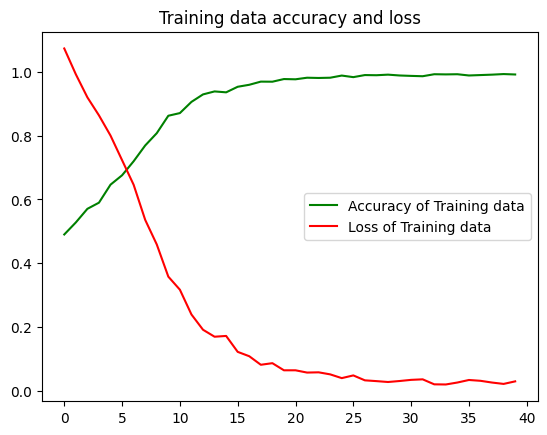

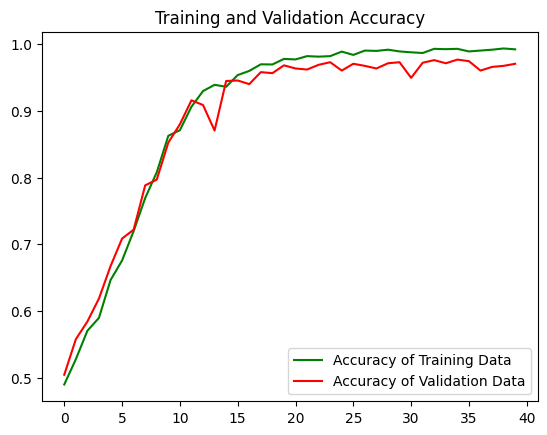

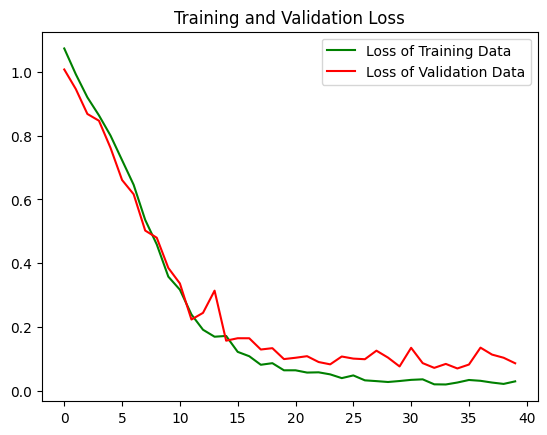

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)

40/40 [==============================] - 9s 206ms/step - loss: 0.1023 - accuracy: 0.9648


In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import VGG16

# Load VGG16 base model without the top classification layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers except for the last 4
for i, layer in enumerate(vgg_model.layers):
    if i < len(vgg_model.layers) - 3:
        layer.trainable = False
    else:
        layer.trainable = True

# Add custom layers
x = vgg_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting

predictions = Dense(4, activation='softmax')(x)  # Add the final classification layer

# Create the final model
vgg_transfer_model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
vgg_transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

vgg_transfer_model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_VGG_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1, save_freq='epoch')

In [ ]:
vgg_transfer_model_history = vgg_transfer_model.fit(X_train, y_train, batch_size=32,\
                                            validation_data=(X_val, y_val), epochs=50,\
                                            verbose=1, shuffle=True, callbacks=[checkpoint])

Epoch 1/50
120/120 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.6346
Epoch 1: val_accuracy did not improve from 0.90703
120/120 [==============================] - 8s 63ms/step - loss: 0.7685 - accuracy: 0.6346 - val_loss: 0.6239 - val_accuracy: 0.7188
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.3348 - accuracy: 0.8724
Epoch 2: val_accuracy did not improve from 0.90703
120/120 [==============================] - 7s 62ms/step - loss: 0.3348 - accuracy: 0.8724 - val_loss: 0.3648 - val_accuracy: 0.8641
Epoch 3/50
119/120 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9215
Epoch 3: val_accuracy did not improve from 0.90703
120/120 [==============================] - 7s 62ms/step - loss: 0.2215 - accuracy: 0.9219 - val_loss: 0.2879 - val_accuracy: 0.8859
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9630
Epoch 4: val_accuracy improved from 0.90703 to 0.92266, saving mode

In [ ]:
vgg_transfer_model.load_weights("best_VGG_model.h5")

In [ ]:
get_ac = vgg_transfer_model_history.history['accuracy']
get_los = vgg_transfer_model_history.history['loss']
val_acc = vgg_transfer_model_history.history['val_accuracy']
val_loss = vgg_transfer_model_history.history['val_loss']

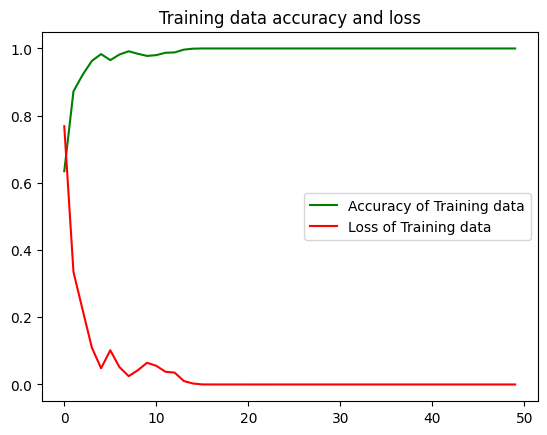

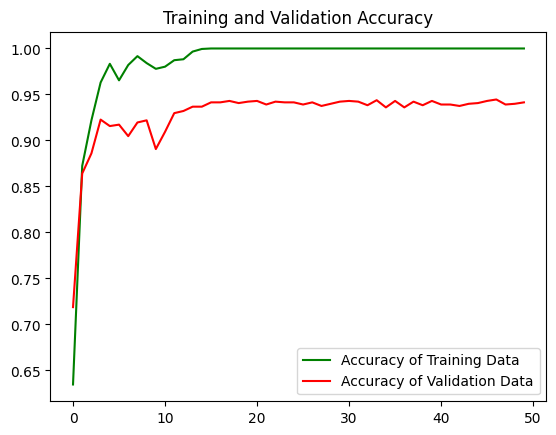

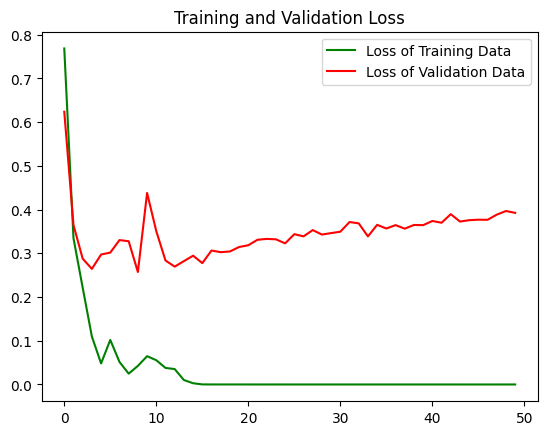

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = vgg_transfer_model.evaluate(X_test,y_test)

40/40 [==============================] - 2s 42ms/step - loss: 0.5953 - accuracy: 0.9312
